<a href="https://colab.research.google.com/github/blufury/Class-projects/blob/master/Boston_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

# **Question 1**

In [ ]:
data = pd.read_csv('Boston.csv')

medv_mean = data['medv'].mean()
print(f'Mean of medv: {medv_mean:.2f}')
data['medv_cat'] = np.where(data['medv'] > medv_mean, 'High', 'Low')
print(data[['medv', 'medv_cat']].head(10))

Mean of medv: 22.53
   medv medv_cat
0  24.0     High
1  21.6      Low
2  34.7     High
3  33.4     High
4  36.2     High
5  28.7     High
6  22.9     High
7  27.1     High
8  16.5      Low
9  18.9      Low


# **Question 2**

In [ ]:
numerical_summary = data.describe()
print(numerical_summary)

       Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      1.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    127.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    253.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    379.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    506.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

Text(0.5, 0, 'Median Value (in $1000s)')

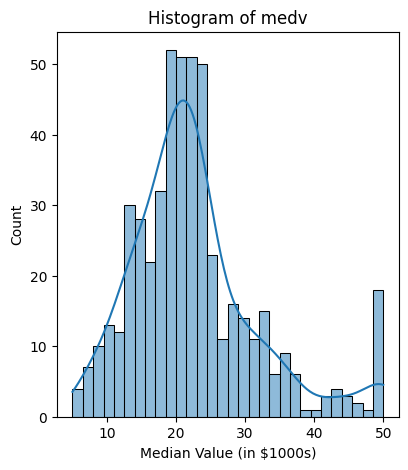

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data['medv'], bins=30, kde=True)
plt.title('Histogram of medv')
plt.xlabel('Median Value (in $1000s)')

In [ ]:
plt.sub